# Informe Final Carrera Data Science - Series de Tiempo.

Informe Final Carrera
Profundiza y ajusta la resolución de tus proyectos: agrega al menos una fuente de datos o prueba un modelo que hasta el momento no hayas aplicado. 

**Introducción - Proyecto / Informe Final Carrera Data Science**

En este proyecto final, profundizare el trabajo realizado en el Proyecto N° 3 de Series de Tiempo.

***Consideraciones Generales***

A - En el Proyecto N°3, en una primera etapa, trabajé sobre un dataset de flujo vehícular desde el año 2017 a 2019. En una segunda instancia, incorporé otro dataset con datos relativos a años anteriores abarcando el período total de 2010 a 2019. 

Apliqué ésta estrategia para verificar si incorporando más datos mejoraba el desempeño de los modelos implementados, lo cual no sucedió. 

**Por tal motivo en este Proyecto Final trabajaré con datos exclusivos de los años 2017, 2018 y 2019.**

B - Asimismo, durante el desarrollo del proyecto N° 3; pude responder a mis primeras incógnitas a la par que surgieron nuevas. 

Estas nuevas preguntas giraron en torno al potencial impacto y afectación del intercambio comercial (interno o externo en argentina), en función de alteraciones del flujo vehicular en particular del descenso del transporte pesado (de mercancías).Surgieron estas nuevas incógnitas, al considerar la gran extensión geográfica del país, el deteriorado sistema de transporte ferroviario; y el limitado sistema de transporte fluvial existente.

Por ello, al finalizar el Proyecto N° 3 me propuse obtener información relativa a otras autopistas que se integran al sistema nacional, articulándose a las que maneja el grupo AUSA. S.A. 

Al momento, no he logrado conseguir información suficiente en cantidad y calidad, para responder a mis nuevos interrogantes.He recurrido a organismos nacionales que administran esa información, pero sin respuesta de su parte.  

**Por este motivo, no se agregan nuevas fuentes de información para el análisis.**

Mencionados estos puntos, defino el objetivo de este Proyecto Final.


***Objetivo***

El objetivo del presente Proyecto, es profundizar el Proyecto Número 3 de la carrera de Data Science, mediante las siguientes acciones:

A- Implementar Prophet.
B- Implementar el modelo predictivo de redes neuronales recurrentes LSTM con Keras (Deep Learning).
C- Lograr mejores visualizaciones de datos.
D- Optimización de código.

Para lograr el objetivo planteado, me propuse mejorar las habilidades técnicas adquiridas durante la carrera; objetivo que logré mediante las siguientes acciones:

A- Revisión de contenidos provistos por Acámica (bitacoras, clases y material adicional).

B - Tomé cursos especializados (en especial Python para Data Science) logrando varias certificaciones, en diversas organizaciones, tales cómo Datacamp, Coursera; etc. 

C- Profundicé mis conocimientos sobre Machine Learning y Deep Learning mediante la lectura de libros especializados, entre los que destaco los publicados por Jason Brownlee (Machine Learning Algorithms, Deep Learning).

D- Consulta permanente a publicaciones en medios y comunidades cómo Kaggle, Medium; GitHub; Towards Data Science; Machine Learning Mastery, etc.  

E- Estudio de documentación de librerías.


***Nuevas Incógnitas***

Con la implementación de los nuevos modelos(Prophet y Keras), ¿obtendré mejores predicciones a futuro en relación al volumen del flujo vehícular de la autopista Illía?


### Desarrollo

***Reseña de la Autopista Illía y del Grupo AUSA. S.A.***

Dicha autopista forma parte de un conjunto de autopistas situadas en la ciudad de Buenos Aires y explotadas por la empresa denominada AUSA S.A., cuyo accionista principal es el Gobierno de la Ciudad de Buenos Aires.

Las autopistas que opera dicha empresa son las siguientes:

Arturo Illia,

25 de Mayo; 

Dellepiane;

Perito Moreno;

Hector Cámpora;

9 de Julio Sur; 

Paseo del Bajo (PDB);

Avenida Lugones; 

Avenida Cantilo.

**Se importan las librerías a utilizar en el proyecto.**

In [430]:
# Esenciales
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import datetime
import math

# Visualización
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from fbprophet.plot import plot_cross_validation_metric
%matplotlib inline

# Algoritmos para Series Temporales
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Dense
from keras.layers import LSTM

#### Exploración de datos.

***Trabajaré exclusivamente con datasets correspondientes a los años 2017,2018 y 2019.***

In [431]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [432]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [433]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [434]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


***Valores que toman los campos: estacion, sentido, tipo_vehiculo y forma_pago***

In [435]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [436]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [437]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [438]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

**Inicio en trabajo con la estación Illia y la forma de pago Efectivo**


In [439]:
#Uno los 3 datasets.
data1 = pd.concat([data_2019, data_2018, data_2017])

#Me quedo solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data1.estacion=='Illia', data1.forma_pago == 'EFECTIVO')
data1 = data1[mask]

#Elimino las columnas que no voy a utilizar
data1.drop(columns = ['periodo','hora_inicio','estacion'], inplace = True)

data1.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
86,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
88,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
94,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
149,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769


In [440]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           238869 non-null  object
 1   hora_fin        238869 non-null  int64 
 2   dia             238869 non-null  object
 3   sentido         238869 non-null  object
 4   tipo_vehiculo   238869 non-null  object
 5   forma_pago      238869 non-null  object
 6   cantidad_pasos  238869 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 14.6+ MB


In [441]:
data1.shape

(238869, 7)

In [442]:
data1.describe()

,hora_fin,cantidad_pasos
count,238869.000000,238869.000000
mean,11.874659,200.384232
std,6.739129,403.246904
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,11.000000
75%,18.000000,104.000000
max,23.000000,2416.000000


**Exporto en formato 'csv' el data frame para usarlo posteriormente**

In [443]:
data1.to_csv('Data2.csv')

**Transformo la columna fecha a formato datetime y agrego hora_fin como hora.**

In [444]:
data1['fecha2'] = pd.to_datetime(data1.fecha) + pd.to_timedelta(data1.hora_fin, unit = 'h')

#Quito las columnas fecha y hora_fin ya que las incluí en el campo fecha2
data1.drop(columns=['fecha','hora_fin'], inplace = True)

data1.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00


In [445]:
#Corrijo el nombre de fecha2 a fecha
data1.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [446]:
#Reordeno el dataset por fecha e imprimo las primeras instancias
data1.sort_values('fecha', inplace = True)
data1.reset_index(drop=True, inplace = True)
data1.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01
1,Domingo,Provincia,Liviano,EFECTIVO,9,2017-01-01
2,Domingo,Provincia,Liviano,EFECTIVO,644,2017-01-01
3,Domingo,Provincia,Pesado,EFECTIVO,6,2017-01-01
4,Domingo,Provincia,Pesado,EFECTIVO,1,2017-01-01


**Grafíco paso vehicular por horas**

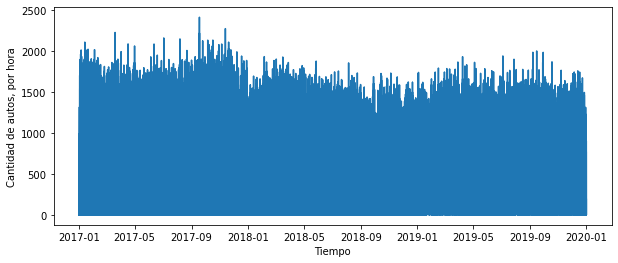

In [447]:
plt.figure(figsize = (10,4))
plt.plot(data1.fecha, data1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

**Resampleo a días.**

In [448]:
diario = data1.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


**Grafíco el paso vehicular por día**

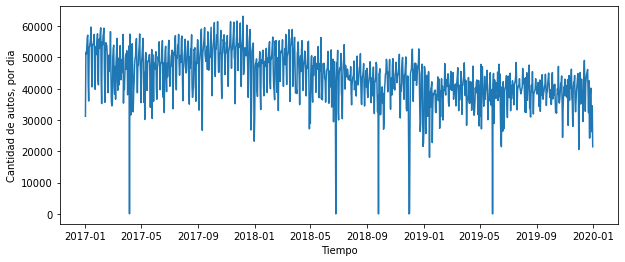

In [449]:
plt.figure(figsize = (10,4))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [450]:
data1.describe()

,cantidad_pasos
count,238869.000000
mean,200.384232
std,403.246904
min,1.000000
25%,2.000000
50%,11.000000
75%,104.000000
max,2416.000000


**Con los primeros datos estadísticos compruebo la existencia de Outliers. Para obtener una impresión visual, grafíco con boxplot.**

In [451]:
data11 = pd.read_csv('Data2.csv')
data11.drop(columns = ['Unnamed: 0'], inplace = True)
data11.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
1,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
2,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
3,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
4,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769


Text(0, 0.5, 'cantidad_pasos')

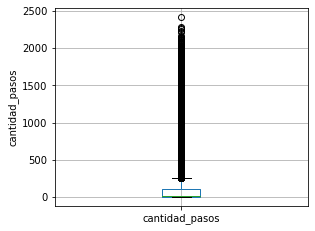

In [452]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
fig = data11.boxplot(column='cantidad_pasos')
fig.set_title('')
fig.set_ylabel('cantidad_pasos')

**Tratamiento de Outliers**

**Elijo remover datos atípicos con IQR.**

In [453]:
Q1 = data11.quantile(0.25)
Q3 = data11.quantile(0.75)
IQR = Q3 - Q1
dfout=data11[~((data11< (Q1 - 1.5 * IQR)) |(data11 > (Q3 + 1.5 * IQR))).any(axis=1)]
dfout.shape

(192654, 7)

**Aplicado IQR, nuevamente grafíco mediante boxplot para obtener una impresión visual del resultado de eliminación de datos atípicos.**

Text(0, 0.5, 'cantidad_pasos')

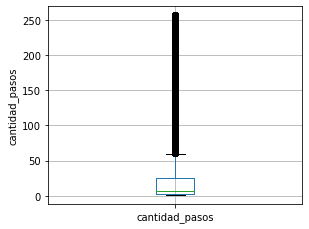

In [454]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
fig = dfout.boxplot(column='cantidad_pasos')
fig.set_title('')
fig.set_ylabel('cantidad_pasos')

**Cómo eliminé instancias reseteo el index de mi dataset**

In [455]:
dfout = dfout.reset_index(drop=True)

**Efectuados los procedimientos iniciales, obtengo un dataset con valores estadísticos más equilibrados.**

In [456]:
dfout.describe()

,hora_fin,cantidad_pasos
count,192654.000000,192654.000000
mean,11.631910,24.982897
std,6.774533,45.721735
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,6.000000
75%,17.000000,25.000000
max,23.000000,257.000000


**Verifico la existencia de valores faltantes**

In [457]:
print(dfout.isnull().sum())

fecha             0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64


In [458]:
dfout.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
1,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
2,2019-01-01,3,Martes,Centro,Pesado,EFECTIVO,7
3,2019-01-01,3,Martes,Provincia,Pesado,EFECTIVO,7
4,2019-01-01,5,Martes,Centro,Pesado,EFECTIVO,1


#### Transformo la columna fecha a formato datetime y agrego hora_fin como hora. 

In [459]:
df=dfout
df['fecha2'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')

#Quito las columnas fecha y hora_fin ya que las incluí en el campo fecha2
df.drop(columns=['fecha','hora_fin'], inplace = True)

df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
1,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
2,Martes,Centro,Pesado,EFECTIVO,7,2019-01-01 03:00:00
3,Martes,Provincia,Pesado,EFECTIVO,7,2019-01-01 03:00:00
4,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 05:00:00


In [460]:
#Corrijo el nombre de fecha2 a fecha
df.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00
1,Martes,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00
2,Martes,Centro,Pesado,EFECTIVO,7,2019-01-01 03:00:00
3,Martes,Provincia,Pesado,EFECTIVO,7,2019-01-01 03:00:00
4,Martes,Centro,Pesado,EFECTIVO,1,2019-01-01 05:00:00


In [461]:
#Reordeno el dataset por fecha e imprimo las primeras instancias
df.sort_values('fecha', inplace = True)
df.reset_index(drop=True, inplace = True)
df.head()

,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,EFECTIVO,21,2017-01-01
1,Domingo,Centro,Liviano,EFECTIVO,23,2017-01-01
2,Domingo,Centro,Pesado,EFECTIVO,1,2017-01-01
3,Domingo,Centro,Pesado,EFECTIVO,10,2017-01-01
4,Domingo,Provincia,Liviano,EFECTIVO,9,2017-01-01


In [462]:
df.shape

(192654, 6)

#### Encoding

Transformo variables categóricas a númericas, con el fin de incluirlas en mi análisis.

In [463]:
dia_get=pd.get_dummies(df['dia'])

In [464]:
vehiculo_get=pd.get_dummies(df['tipo_vehiculo'])

In [465]:
sentido_get=pd.get_dummies(df['sentido'])

In [466]:
forma_pago_get=pd.get_dummies(df['forma_pago'])

**Defino un nuevo dataset, con las variables encodeadas.**

In [467]:
data=pd.concat([df, dia_get,vehiculo_get, sentido_get,forma_pago_get], axis=1)

**Elimino las columnas categóricas encodeadas.**

In [468]:
columnas_descartables = ['dia','tipo_vehiculo','sentido','forma_pago']

In [469]:
data = data.drop(columns=columnas_descartables)

**Reseteo el index del dataset.**

In [470]:
data.reset_index(drop=True, inplace = True)

#### Imprimo las primeras instancias del nuevo dataset.

In [471]:
data.head()

,cantidad_pasos,fecha,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Liviano,Pesado,Centro,Provincia,EFECTIVO
0,21,2017-01-01,1,0,0,0,0,0,0,0,1,1,0,1
1,23,2017-01-01,1,0,0,0,0,0,0,1,0,1,0,1
2,1,2017-01-01,1,0,0,0,0,0,0,0,1,1,0,1
3,10,2017-01-01,1,0,0,0,0,0,0,0,1,1,0,1
4,9,2017-01-01,1,0,0,0,0,0,0,1,0,0,1,1


#### Resampleo a Días para visualizar mejor los datos. 

In [472]:
diario = data.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 13)


,cantidad_pasos,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Liviano,Pesado,Centro,Provincia,EFECTIVO
fecha,,,,,,,,,,,,,
2017-01-01,2925,192.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,137.0,106.0,86.0,192.0
2017-01-02,7819,0.0,0.0,273.0,0.0,0.0,0.0,0.0,54.0,219.0,165.0,108.0,273.0
2017-01-03,7151,0.0,0.0,0.0,267.0,0.0,0.0,0.0,56.0,211.0,159.0,108.0,267.0
2017-01-04,8303,0.0,0.0,0.0,0.0,280.0,0.0,0.0,55.0,225.0,170.0,110.0,280.0
2017-01-05,8314,0.0,275.0,0.0,0.0,0.0,0.0,0.0,53.0,222.0,171.0,104.0,275.0


#### Grafíco Cantidad de Paso Vehícular por Día. 

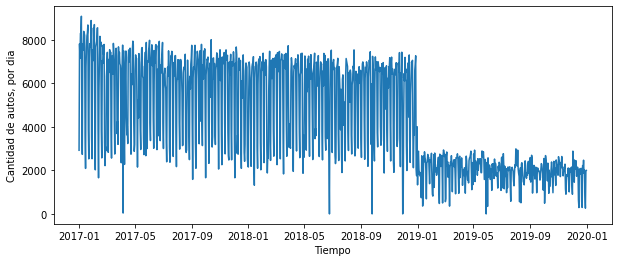

In [473]:
plt.figure(figsize = (10,4))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### Nuevas incógnitas.

Al resamplear a días y obtener el gráfico anteriór, resulta evidente la caida de flujo de tráfico en la autopista Illía, a partír del año 2019.

Por todo esto me surgieron los siguientes interrogantes:

*¿Cúal fue el motivo para esta significativa reducción de flujo vehicular, en una arteria de suma importancia de la ciudad de Buenos Aires, cómo es la Autopista Illía?

*¿Por qué medios se absorbió el flujo vehicular que disminuyó en la misma?,¿Se desvió dicho flujo hacia otra autopista? 

*¿La disminución de tránsito fue homogénea tanto para vehículos livianos, cómo pesados?

**Por este motivo decidí incorporar en mi análisis, otras features: forma de pago, días; sentido y tránsito por tipo de vehículo sea este liviano o pesado**

**Resultados del análisis de esos datos:**

**Variables Forma de Pago:** se incorporan nuevas formas de pago pero no se evidencia una nueva forma de pago que reemplace a otra de forma exponencial.

**Días:** en todas las autopistas se verifica un mayor flujo vehícular de lunes a viernes. El descenso del flujo en fines de semana, tampoco es tan significativo.

**Sentido:** el flujo de tránsito considerando el "sentido" es homogeneo en la serie de tiempo. No hay cambios significativos.

**Tipo de vehículo:** en la mayoría de las autopistas, se evidencia una marcada disminución en el volumen de tránsito vehicular desde el año 2019 y en paralelo una disminución más acentuada del transito de vehículos pesados. 

**Análisis por tránsito liviano - pesado.**

In [474]:
sint=pd.read_excel('autopistas_res.xlsx')

In [475]:
sint.shape

(3, 25)

In [476]:
sint.head()

,Año,Au1,ve_pes,ve_liv,Au2,ve_pes.1,ve_liv.1,Au3,ve_pes.2,ve_liv.2,...,ve_liv.4,Au6,ve_pes.5,ve_liv.5,Au7,ve_pes.6,ve_liv.6,Au8,ve_pes.7,ve_liv.7
0,2017,Illia,161166,130734,Avellaneda,244316,147526,Dellepiane,221817,135307,...,104757,Sarmiento,5196,19035,Salguero,5409,17972,Paseo del Bajo (PDB),0,0
1,2018,Illia,163619,135900,Avellaneda,238936,155435,Dellepiane,211892,141549,...,105900,Sarmiento,5976,21537,Salguero,8660,19398,Paseo del Bajo (PDB),0,0
2,2019,Illia,60272,100861,Avellaneda,82819,103624,Dellepiane,84438,103162,...,85453,Sarmiento,7602,17288,Salguero,8119,16750,Paseo del Bajo (PDB),20512,20452


**Gráficos por Autopista y Volumen de Flujo Vehícular por tipo de Vehículo (Tránsito Pesado o Liviano)**

**Autopista Arturo Illía**

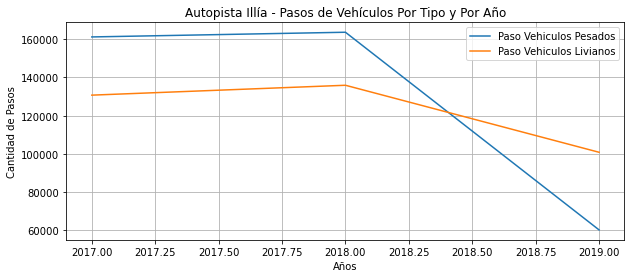

In [477]:
plt.figure(figsize = (10,4))
x = sint['Año']
y1 = sint['ve_pes']
y2 = sint['ve_liv']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Illía - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

**Autopista Avellaneda**

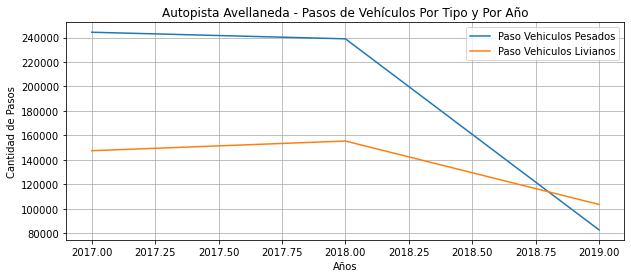

In [478]:
plt.figure(figsize = (10,4))
x = sint['Año']
y1 = sint['ve_pes.1']
y2 = sint['ve_liv.1']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Avellaneda - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()
             

**Autopista Dellepiane**

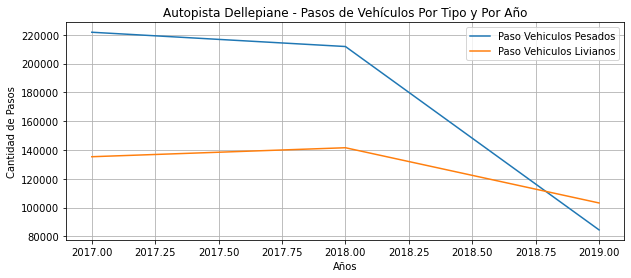

In [479]:
plt.figure(figsize = (10,4))
x = sint['Año']
y1 = sint['ve_pes.2']
y2 = sint['ve_liv.2']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Dellepiane - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

**Autopista Retiro.**

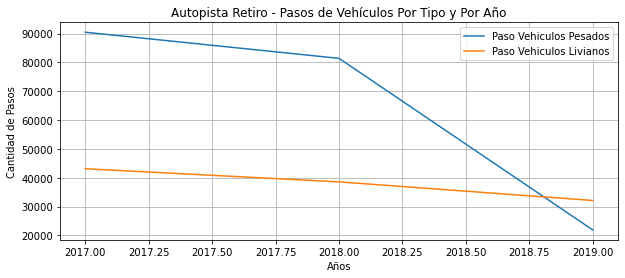

In [480]:
plt.figure(figsize = (10,4))
x = sint['Año']
y1 = sint['ve_pes.3']
y2 = sint['ve_liv.3']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Retiro - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

**Autopista Alberti.**

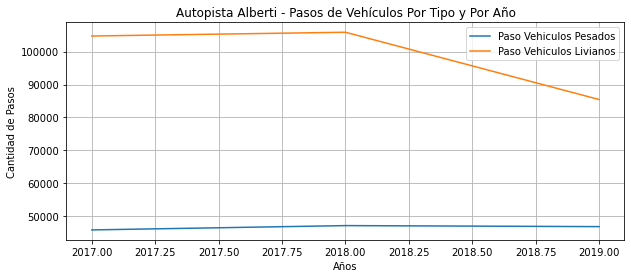

In [481]:
plt.figure(figsize = (10,4))
x = sint['Año']
y1 = sint['ve_pes.4']
y2 = sint['ve_liv.4']
plt.plot(x, y1, label = 'Paso Vehiculos Pesados')
plt.plot(x, y2, label = 'Paso Vehiculos Livianos')
plt.xlabel('Años')
plt.ylabel('Cantidad de Pasos')
plt.title('Autopista Alberti - Pasos de Vehículos Por Tipo y Por Año')
plt.grid()
plt.legend() 
plt.show()

Cómo se puede apreciar en los gráficos, desde el año 2019 se evidencia una caída en el flujo vehiculár en todas estas autopistas. Y en paralelo una disminución marcada del tránsito pesado.

***Defino una nueva variable asignandole los valores de cantidad de pasos por día***

La misma la emplearé para las próximas visualizaciones y análisis.

In [482]:
senial = diario.cantidad_pasos

***Imprimo los límites temporales del dataset.***

In [483]:
print(senial.index.min())
print(senial.index.max())

2017-01-01 00:00:00
2019-12-31 00:00:00


***Resampleo la nueva variable ("senial") a mes considerando el valor de de la media del flujo vehícular.***

In [484]:
meses=senial.resample('M').mean()

***Imprimo los primeros datos estadísticos***

In [485]:
meses.describe()

count      36.000000
mean     4396.042989
std      1765.713317
min      1766.774194
25%      2070.653226
50%      5380.167857
75%      5625.532258
max      6526.064516
Name: cantidad_pasos, dtype: float64

***Visualizaciones***

***Compración Flujo Vehícular Diario por Año.***

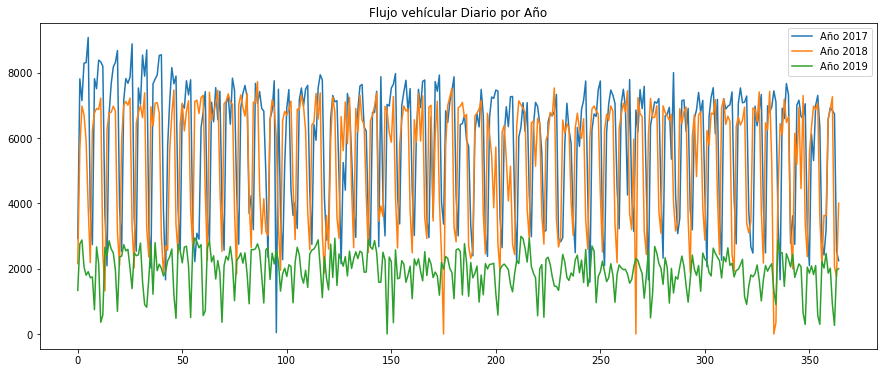

In [486]:
matplotlib.rcParams['figure.figsize'] = [15,6]
plt.plot(senial['2017'].values, label = 'Año 2017')
plt.plot(senial['2018'].values,label = 'Año 2018')
plt.plot(senial['2019'].values,label = 'Año 2019')
plt.title('Flujo vehícular Diario por Año')
plt.legend()

La gráfica anterior permite visualizar que las series de tiempo para los años 2017 y 2018 comparten patrones marcadamente similares entre sí; mientras que resalta claramente la caída general del flujo vehicular en 2019, como así también permite inferir la diferencia en los componentes intrínsecos de estas series de tiempo.

***Grafíco el valor de la media del paso vehícular mensual, por cada año***

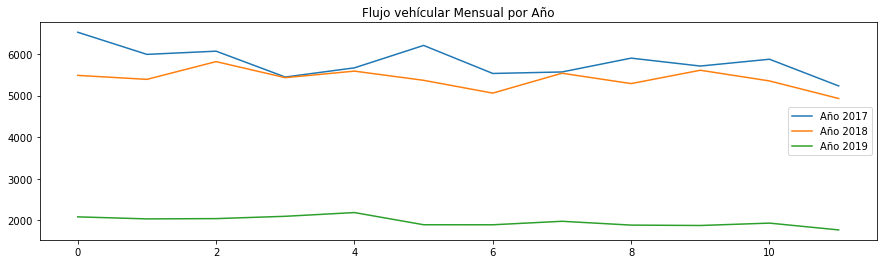

In [487]:
matplotlib.rcParams['figure.figsize'] = [15,4]
plt.plot(meses['2017'].values, label = 'Año 2017')
plt.plot(meses['2018'].values, label = 'Año 2018')
plt.plot(meses['2019'].values, label = 'Año 2019')
plt.title('Flujo vehícular Mensual por Año')
plt.legend()

Al efectuar una observación mensual del tránsito, las diferencias entre los patrones de tránsito de 2017-2018 versus el año 2019, resultan más claras.

***Grafíco y evalúo el comportamiento del paso vehícular, por año y estación "Verano" de cada año .***

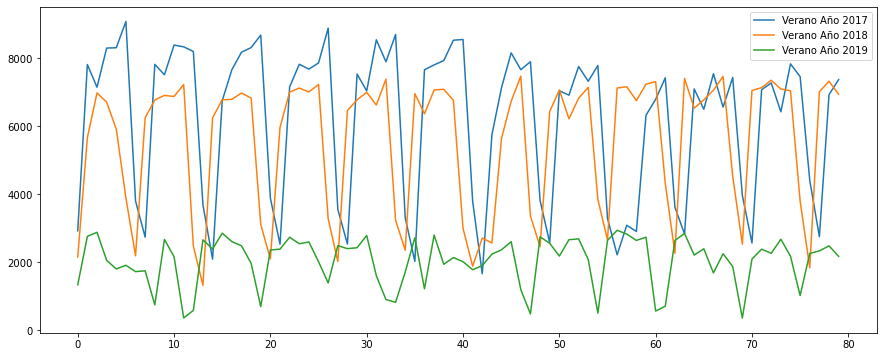

In [488]:
matplotlib.rcParams['figure.figsize'] = [15,6]
verano2017 = senial['2017-01-01':'2017-03-21']
plt.plot(verano2017.values,label = 'Verano Año 2017')
verano2018 = senial['2018-01-01':'2018-03-21']
plt.plot(verano2018.values, label = 'Verano Año 2018')
verano2019 = senial['2019-01-01':'2019-03-21']
plt.plot(verano2019.values, label = 'Verano Año 2019')
plt.legend()

Del gráfico anterior se puede observar que además de la disminución del flujo vehícular, ha cambiado significativamente el comportamiento de la estacionalidad en 2019. Mientras que 2017 y 2018, muestran un patrón de estacionalidad bastante similar.

**Respuestas a las nuevas incógnitas.**

En la etapa de procesamiento de datos efectuado, cómo ya se expresó resulta evidente la disminución del flujo vehícular en general. Por lo tanto procedí a investigar como fuente externa al plan de obras del grupo AUSA S.A. y del mismo surgen las siguientes respuestas a las incógnitas emergentes del fenómeno observado:

*¿Cúal fue el motivo para esta significativa reducción de flujo vehicular, en una arteria de suma importancia de la ciudad de Buenos Aires, cómo es la Autopista Illía?*

Respuesta: AUSA S.A. emprendió desde el año 2016 un plan de grandes obras, de profundo impacto en la dinámica del tránsito de CABA. La disminución general del tránsito y en particular la acentuada reducción del tránsito pesado obedecería a este plan de obras. Una obra emblemática es la nueva autopista Paseo del Bajo (PDB), la que ha sido incluida en el dataset del año 2019.


*¿Por qué medios se absorbió el flujo vehicular que disminuyó en la misma?,¿Se desvió dicho flujo hacia otra autopista?*

El análisis del datasets, no permite responder con datos a ésta incógnita, dado que de las autopistas relevadas(de las que se conocen datos), ninguna en particular, o todas en conjunto han absorvido la disminución del tránsito, sea pesado o liviano. 
Los datos disponibles de la nueva autopista del Paseo del Bajo (PDB), representa una tránsito de  40964 vehículos.

*¿La disminución de tránsito fue homogénea tanto para vehículos livianos, cómo pesados?*

La disminución del tránsito no ha sido homogenea ya sea que se trate de vehículos livianos o vehículos pesados.

**Disminución de tránsito general para el conjunto de autopistas.Promedio años 2017-2018 vs 2019**

Disminución en Porcentaje de Tránsito Liviano:24%.

Disminución en Porcentaje de Tránsito Pesado:53%.

**Disminución de tránsito general para la autopista Arturo Illía.Promedio años 2017-2018 vs 2019**

Disminución en Porcentaje de Tránsito Liviano:24%.

Disminución en Porcentaje de Tránsito Pesado:63%.

**Con las Respuestas obtenidas surgen nuevas hipótesis:**

*¿El flujo vehícular fue absorvido por alguna/s autopista/s no contemplada/s en este Dataset?*

*¿El dataset está incompleto o sesgado?*


### Retomo el estudio de la Autopista Illía y forma de pago Efectivo.

### Análisis de la Serie de Tiempo Original, Tendencia Lineal y Rolling Windows.

Implemento Ventanas Móviles (rolling windows)


In [489]:
ventana = int(365*2/7)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

#### Grafíco Cantidad Promedio de Pasos y Pasos Promedio Mediante Ventanas Móviles. 

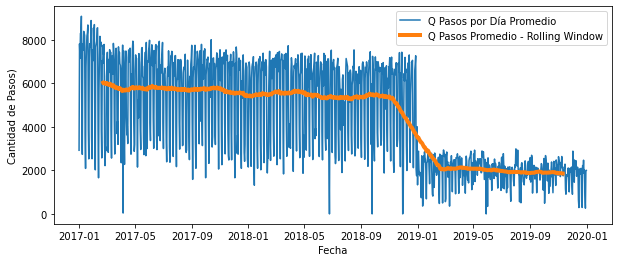

In [490]:
plt.figure(figsize = (10,4))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Q Pasos por Día Promedio')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Q Pasos Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos)')
plt.legend()
plt.show()

**Realizo una Tendencia Lineal - LinearRegression**

In [491]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,Domingo,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,Liviano,Pesado,Centro,Provincia,EFECTIVO,fecha_numeros
fecha,,,,,,,,,,,,,,
2017-01-01,2925,192.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,137.0,106.0,86.0,192.0,736330
2017-01-02,7819,0.0,0.0,273.0,0.0,0.0,0.0,0.0,54.0,219.0,165.0,108.0,273.0,736331
2017-01-03,7151,0.0,0.0,0.0,267.0,0.0,0.0,0.0,56.0,211.0,159.0,108.0,267.0,736332
2017-01-04,8303,0.0,0.0,0.0,0.0,280.0,0.0,0.0,55.0,225.0,170.0,110.0,280.0,736333
2017-01-05,8314,0.0,275.0,0.0,0.0,0.0,0.0,0.0,53.0,222.0,171.0,104.0,275.0,736334


In [492]:
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

#### Grafíco Pasos Promedio Diario, Pasos Diarios Promedios por Ventanas Móviles y Pasos Diarios Promedios por Ajuste Lineal.

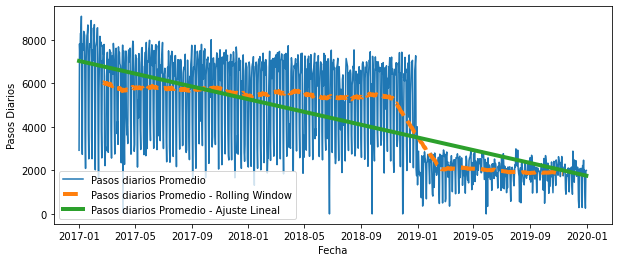

In [493]:
plt.figure(figsize = (10,4))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Pasos diarios Promedio')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Pasos diarios Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos diarios Promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')
plt.legend()
plt.show()

**Nota:nuevamente se comprueba la tendencia a la disminución del flujo vehícular con el paso del tiempo.**

#### Gráficos desagregados de Pasos Vehículares según Serie Original, Ventanas Móviles y la Diferencia entre ambas.

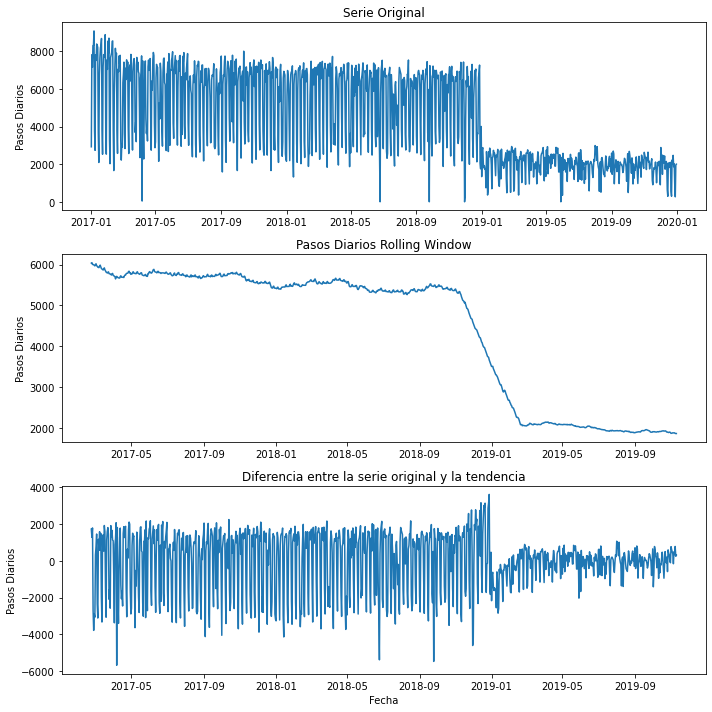

In [494]:
plt.figure(figsize = (10,10))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Pasos Diarios')

plt.subplot(3,1,2)
plt.title('Pasos Diarios Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Pasos Diarios')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Pasos Diarios')

plt.tight_layout()
plt.show()

### Descomposición de la Serie de Tiempo.

#### Procedo a descomponer la Serie de Tiempo con statmodels. 

In [495]:
result = seasonal_decompose(diario.cantidad_pasos, model='additive')

#### Componente Tendencial

In [496]:
result.trend

fecha
2017-01-01            NaN
2017-01-02            NaN
2017-01-03            NaN
2017-01-04    6771.571429
2017-01-05    6744.714286
                 ...     
2019-12-27    1642.142857
2019-12-28    1639.285714
2019-12-29            NaN
2019-12-30            NaN
2019-12-31            NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

#### Componente Estacional

In [497]:
result.seasonal

fecha
2017-01-01   -2225.267384
2017-01-02     302.573169
2017-01-03     649.122478
2017-01-04     948.627824
2017-01-05     781.141561
                 ...     
2019-12-27     906.106762
2019-12-28   -1362.304410
2019-12-29   -2225.267384
2019-12-30     302.573169
2019-12-31     649.122478
Freq: D, Name: seasonal, Length: 1095, dtype: float64

#### Gráficos desagregados de Pasos Vehículares según Serie Original, Tendencia, Estacionalidad y Ruido(resíduo).

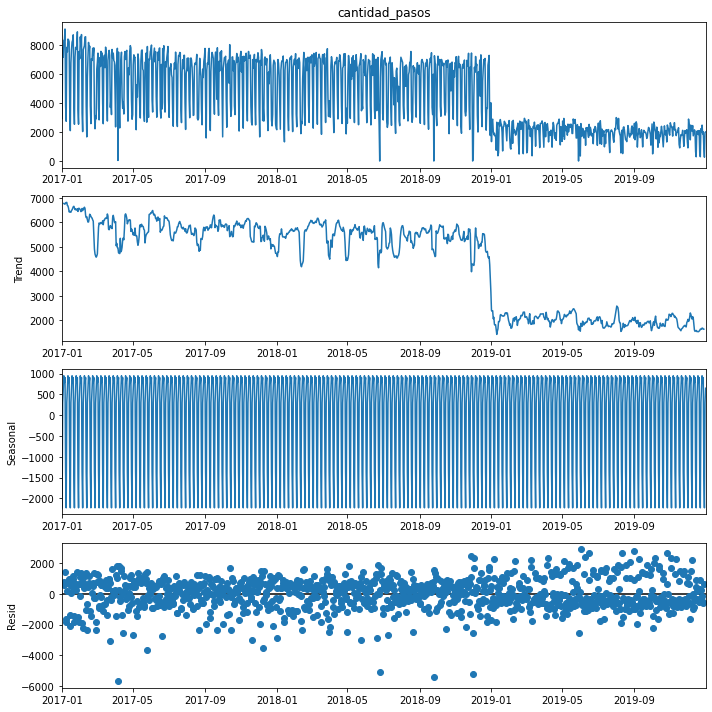

In [498]:
matplotlib.rcParams['figure.figsize'] = [10,10]
result.plot()
plt.show()

#### Histograma del Ruido - Residuo

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


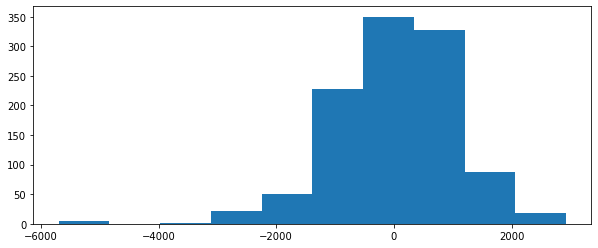

In [499]:
plt.figure(figsize = (10,4))
plt.hist(result.resid, bins = 10)
plt.show()

#### Implemento Autocorrelación con statsmodels.

In [500]:
nlags =  52
autocorr = acf(diario.cantidad_pasos, nlags = nlags, fft=False)

In [501]:
autocorr.shape

(53,)

#### Grafíco la Autocorrelación.

Text(0.5, 0, 'lag')

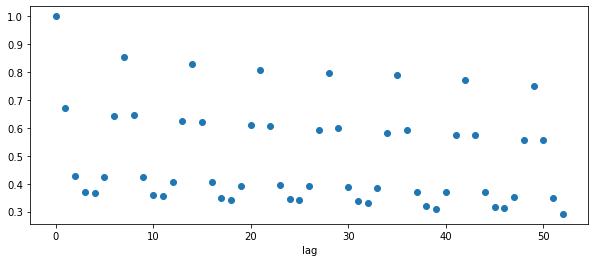

In [502]:
plt.figure(figsize = (10 ,4 ))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

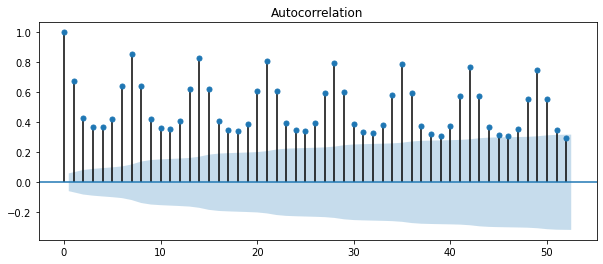

In [503]:
matplotlib.rcParams['figure.figsize'] = [10,4]
plot_acf(diario.cantidad_pasos, lags = nlags)
plt.show()

### Predicción a Futuro.  

***Implemento One-Step Prediction***

**Defino cuántos valores *hacia atrás* tomaré (52 semanas)**

In [504]:
look_back = 52 # uso 1 anios de datos para predecir el valor siguiente

In [505]:
N = senial.shape[0]
N 

1095

In [506]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1042, 52) (1042,)


#### Defino `X` e `y`

In [507]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

#### Imprimo `X` e `y

In [508]:
print(X)

[[2925. 7819. 7151. ... 2574. 7047. 6918.]
 [7819. 7151. 8303. ... 7047. 6918. 7761.]
 [7151. 8303. 8314. ... 6918. 7761. 7326.]
 ...
 [2367. 2211. 2640. ... 2470. 1865. 2016.]
 [2211. 2640. 2105. ... 1865. 2016.  904.]
 [2640. 2105. 2164. ... 2016.  904.  264.]]


In [509]:
print(y)

[7761. 7326. 7791. ...  904.  264. 1956.]


#### Realizo train/test split. 

In [510]:
N_train = 3*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(104, 52) (104,)
(52, 52) (52,)


### Implemento Random Forest Regressor

In [511]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

#### Grafíco la importancia de cada feature.

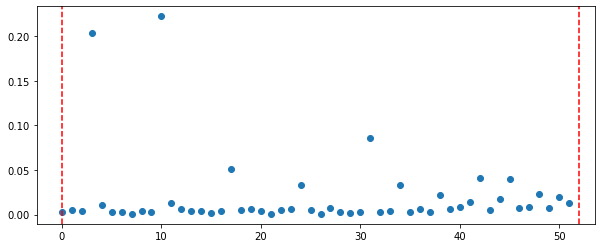

In [512]:
plt.figure(figsize = (10,4))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(2)*52:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

#### Predigo con Random Forest Regressor.

In [513]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#### Grafíco.

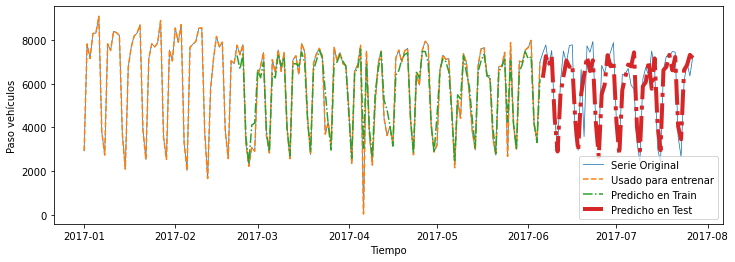

In [514]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.show()

#### Calcúlo el Error en Train y en Test. Utilizo RMSE cómo métrica.

In [515]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 578.3156251422348
Error en Test: 810.6697861182444


### Modelo Benchmark - Predicción basada en copiar el valor de la fecha anterior.

In [516]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

#### Grafíco Serie Original y Predicción del Modelo Benchmark 

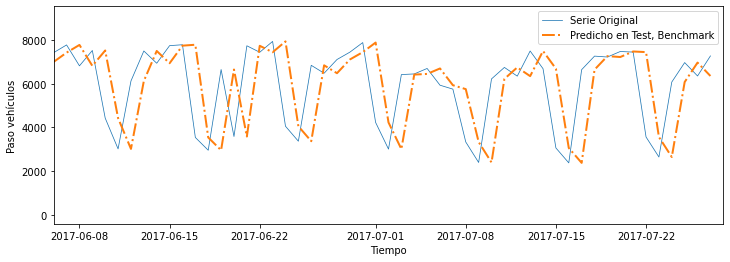

In [517]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos')
plt.legend()
plt.show()

#### Calcúlo el Error en Train y en Test del Modelo Benchmark. Utilizo RMSE cómo métrica.

In [518]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

2085.589526507295


#### El modelo Elegido(Random Forest Regressor) obtiene un mejor desempeño que el Modelo de Benchmark; considerando RMSE en Test.

### Implemento Multi-Step Prediction.

In [519]:
y_ms_test_pred = []
x = X_test[0,:] # inicio con las primeras instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

#### Grafico desagregado de la Serie Original, de los Datos usados para Train; Predicho en Train y Predicho en Test con Multi-Step Prediction.

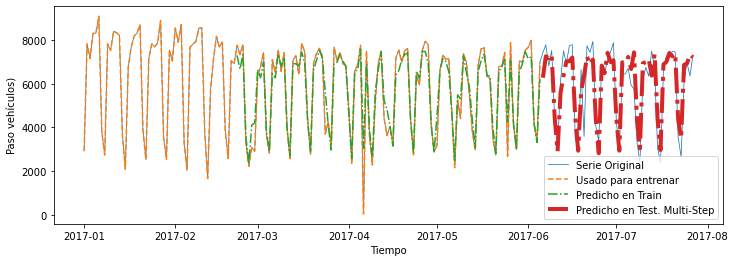

In [520]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Paso vehículos)')
plt.show()

#### Calcúlo el Error en Train y en Test con Multi-Step Predictión. Utilizo RMSE cómo métrica.

In [521]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 761.8999090078393


### Conclusión: el mejor modelo por su desempeño en Test es Multi-Step Predictión.

**Modelo Benchmark, error en Test:**2085.58.

**Random Forest Regressor, error en Test:**810.66.

**Multi-Step Predictión, error en Test:**761.89.

# Implemento la Librería Prophet.

In [522]:
df_prop=senial.to_frame()
df_prop = df_prop.reset_index()
df_prop.index.name = 'Index'
df_prop.columns    = ['ds', 'y']
df_prop

,ds,y
Index,,
0,2017-01-01,2925
1,2017-01-02,7819
2,2017-01-03,7151
3,2017-01-04,8303
4,2017-01-05,8314
...,...,...
1090,2019-12-27,2016
1091,2019-12-28,904
1092,2019-12-29,264


In [523]:
df_prop.ds >='2019-01-01'

Index
0       False
1       False
2       False
3       False
4       False
        ...  
1090     True
1091     True
1092     True
1093     True
1094     True
Name: ds, Length: 1095, dtype: bool

In [524]:
mask=df_prop.ds >='2019-01-01'

In [525]:
df_prop=df_prop[mask]

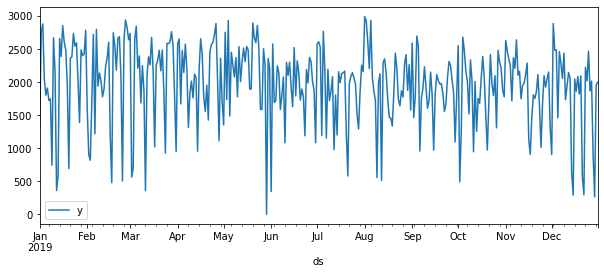

In [526]:
df_prop.plot(x='ds',y='y')

In [527]:
m = Prophet()
m.fit(df_prop)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [528]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
450,2020-03-26
451,2020-03-27
452,2020-03-28
453,2020-03-29
454,2020-03-30


El método de predicción asignará a cada fila en el futuro un valor predicho que denomina yhat. Si pasa las fechas históricas, proporcionará un ajuste en la muestra. El objeto de pronóstico aquí es un nuevo marco de datos que incluye una columna yhat con el pronóstico, así como columnas para componentes e intervalos de incertidumbre.

In [529]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
450,2020-03-26,2001.751127,1375.266831,2665.204400
451,2020-03-27,1891.321098,1228.692631,2616.702069
452,2020-03-28,1510.895068,831.674848,2168.623692
453,2020-03-29,1189.914813,524.696392,1839.414123
454,2020-03-30,1831.469562,1221.274384,2480.706690


***Grafíco la predicción con Prophet.***

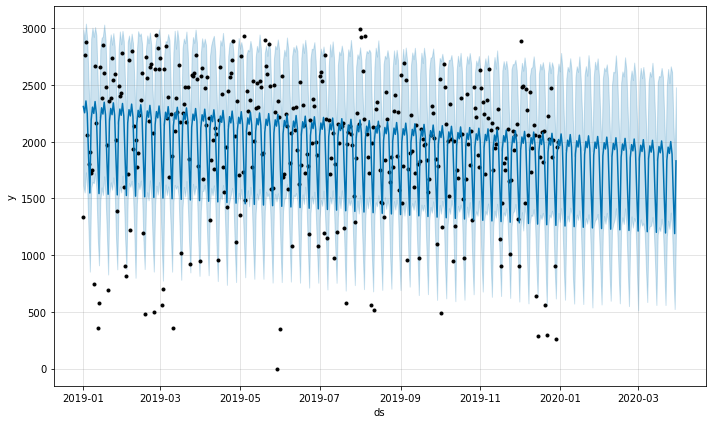

In [530]:
matplotlib.rcParams['figure.figsize'] = [10,4]
fig1 = m.plot(forecast)

***Grafíco los componentes de la Serie de Tiempo con Prophet.***

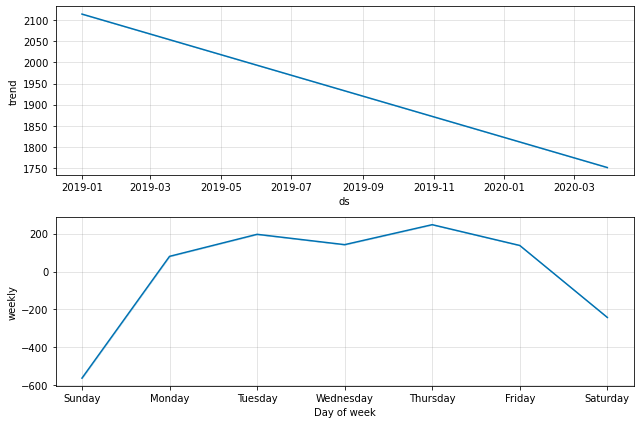

In [531]:
matplotlib.rcParams['figure.figsize'] = [8,4]
fig2 = m.plot_components(forecast)

***Implemento Validación Cruzada con Prophet.***

In [532]:
df_cv = cross_validation(m, initial='90 days', period='180 days', horizon = '180 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-07-04 00:00:00 and 2019-07-04 00:00:00


In [533]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-07-05,2214.419562,1597.581061,2879.144376,2769,2019-07-04
1,2019-07-06,1793.187586,1088.278038,2513.959583,2197,2019-07-04
2,2019-07-07,1403.931352,711.537412,2136.641087,1154,2019-07-04
3,2019-07-08,2186.383533,1503.572024,2888.524698,2193,2019-07-04
4,2019-07-09,2327.440495,1636.330843,2997.378542,1720,2019-07-04


In [534]:
cutoffs = pd.to_datetime(['2019-02-15', '2019-08-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='180 days')

***Implemento performance_metrics***

La misma sirve para calcular algunas estadísticas del rendimiento de la predicción (yhat, yhat_lower y yhat_upper en comparación con y), en función de la distancia desde el límite (qué tan lejos en el futuro estaba la predicción).

Las estadísticas calculadas son el error cuadrático medio (MSE), raíz del error cuadrático medio(root-mean-square error- RMSE), el error absoluto medio (MAE), el error porcentual absoluto medio (MAPE), el error porcentual absoluto medio (MDAPE) y la cobertura de las estimaciones yhat_lower y yhat_upper.

Estos se calculan en una ventana móvil de las predicciones en df_cv después de clasificar por horizonte (ds menos corte). Por defecto, el 10% de las predicciones se incluirán en cada ventana, pero esto se puede cambiar con el argumento rolling_window.

In [535]:
df_p = performance_metrics(df_cv)
df_p.head(20)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,218295.405594,467.220939,348.250814,0.281912,0.168216,0.888889
1,19 days,204468.604375,452.182048,330.898203,0.277231,0.165509,0.888889
2,20 days,195467.094664,442.116608,310.253458,0.267854,0.147438,0.888889
3,21 days,199173.352445,446.288418,316.335819,0.265492,0.147438,0.888889
4,22 days,202577.043003,450.085595,329.724292,0.272303,0.147438,0.888889
5,23 days,186352.267875,431.685381,311.387431,0.262821,0.147438,0.888889
6,24 days,181713.674475,426.278869,300.537804,0.258518,0.128410,0.888889
7,25 days,181598.835189,426.144148,300.368473,0.259545,0.128410,0.888889
8,26 days,96657.430464,310.897781,235.747022,0.190964,0.120819,0.944444
9,27 days,96669.417443,310.917059,236.146330,0.191092,0.120819,0.944444


***Implemento métricas de rendimiento de validación cruzada.***

Los puntos del gáfico que se encuentra a continuación, muestran el porcentaje de error absoluto para cada predicción. 

La línea azul muestra la raíz del error cuadrático medio (RMSE), donde la media se toma sobre una ventana móvil de puntos. 

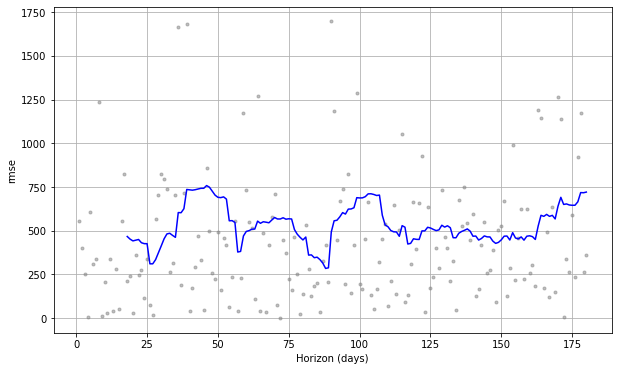

In [536]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

***Observaciones sobre la implementación de Prophet*** 

Prophet es una librería de Facebook, que interactúa totalmente con Python, de sencilla implementación, código simple y los resultados del modelo son óptimos.

Para el presente proyecto elegí la métrica RMSE (raíz del error cuadrático medio) y he obtenido el mejor resultado, en un horizonte de 26 días; en el cual el valor del error es igual a : 310.89.

***Resultados del RMSE en Test en los modelos implementados:***

**Modelo Benchmark, error en Test:** 2085.58.

**Random Forest Regressor, error en Test:** 810.66.

**Multi-Step Predictión, error en Test:** 761.89.

**Prophet, error en Test:** 310.89

**Conclusión:** el mejor modelo de los hasta aquí implementados, considerando el resultado de RMSE obtenido en Test y por el bajo costo computacional es **Prophet**. 


## Implemento Keras - Recurrent Neural Networks - LSTM.

**Long Short-Term Memory, o red LSTM**

***Nota: La siguiente implementación, la efectúo tomando cómo base de estudio el libro "Deep Learning With Python" de Jason Brownlee.***

***Nota sobre LSTM*** 

La red Long Short-Term Memory, o red LSTM, es una red neuronal recurrente que se entrena mediante la retropropagación a través del tiempo y supera el problema del gradiente de desaparición.

Como tal, se puede usar para crear grandes redes recurrentes que, a su vez, se pueden usar para abordar problemas de secuencia difíciles en el aprendizaje automático y lograr resultados de vanguardia.

En lugar de neuronas, las redes LSTM tienen bloques de memoria que están conectados a través de capas.

Un bloque tiene componentes que lo hacen más inteligente que una neurona clásica y una memoria para secuencias recientes. Un bloque contiene puertas que administran el estado y la salida del bloque. Un bloque opera sobre una secuencia de entrada y cada puerta dentro de un bloque utiliza las unidades de activación sigmoidea para controlar si se activan o no, lo que condiciona el cambio de estado y la adición de información que fluye a través del bloque.

***Creo una nueva variable que almacena una copia del dataset inicial.***

In [537]:
dia_ker=diario.copy()

In [538]:
dia_ker['pasos'] = dia_ker.cantidad_pasos

#Elimino las columnas que no voy a usar en el modelo
dia_ker.drop(columns=['cantidad_pasos', 'fecha_numeros','Domingo','Jueves','Lunes','Martes',
                      'Miércoles','Sábado','Viernes','Liviano','Pesado','Centro','Provincia',
                      'EFECTIVO'], inplace = True)
dia_ker.head()

,pasos
fecha,
2017-01-01,2925
2017-01-02,7819
2017-01-03,7151
2017-01-04,8303
2017-01-05,8314


***Reseteo el index***

In [539]:
dia_ker.reset_index()

,fecha,pasos
0,2017-01-01,2925
1,2017-01-02,7819
2,2017-01-03,7151
3,2017-01-04,8303
4,2017-01-05,8314
...,...,...
1090,2019-12-27,2016
1091,2019-12-28,904
1092,2019-12-29,264
1093,2019-12-30,1956


***Grafíco los pasos vehículares diarios por día***

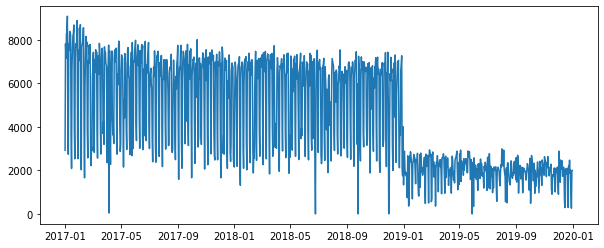

In [540]:
dataset = dia_ker
plt.figure(figsize = (10,4))
plt.plot(dataset)
plt.show()

**Fijo la semilla (seed) para garantizar que los resultados sean reproducibles.**

In [541]:
import numpy
numpy.random.seed(7)

**Cargo el dataset como un dataframe. Extraigo una matriz NumPy del dataframe y convierto los valores enteros en valores flotantes, que son más adecuados para modelar con una red neuronal.**

In [542]:
dataframe = dia_ker
dataset = dataframe.values
dataset = dataset.astype('float32')

**LSTM es sensible a la escala de los datos de entrada, por lo tanto escalo los datos. Luego entreno el modelo.**

In [543]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

**Establezco la proporción de datos que emplearé para entrenar el modelo(65%), el resto de los datos (35%) los emplearé para testear el modelo.**

In [544]:
train_size = int(len(dataset) * 0.65)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

711 384


**Uso una función para crear un nuevo conjunto de datos.**

La función toma dos argumentos: el conjunto de datos (que es un array de NumPy que queremos convertir en una matriz), y el look_back , que es el número de pasos de tiempo anteriores para usar como variables de entrada para predecir el próximo período de tiempo.

In [545]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

**Llamo a la función definida en el paso anterior**

In [546]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

**La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica (muestras, pasos de tiempo, features). 
Como la estructura de los datos tienen el formato: (muestras, features),los transformo usando numpy.reshape ()**

In [547]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

***La red tiene una capa visible con 1 entrada, una capa oculta con 4 bloques LSTM o neuronas y una capa de salida que hace una predicción de valor único. La red está entrenada para 50 épocas y se utiliza un tamaño de lote de 1.***

In [548]:
%%time
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
709/709 - 0s - loss: 0.1057
Epoch 2/50
709/709 - 0s - loss: 0.0416
Epoch 3/50
709/709 - 0s - loss: 0.0414
Epoch 4/50
709/709 - 0s - loss: 0.0415
Epoch 5/50
709/709 - 0s - loss: 0.0413
Epoch 6/50
709/709 - 0s - loss: 0.0416
Epoch 7/50
709/709 - 0s - loss: 0.0413
Epoch 8/50
709/709 - 0s - loss: 0.0412
Epoch 9/50
709/709 - 0s - loss: 0.0414
Epoch 10/50
709/709 - 0s - loss: 0.0414
Epoch 11/50
709/709 - 0s - loss: 0.0413
Epoch 12/50
709/709 - 0s - loss: 0.0414
Epoch 13/50
709/709 - 0s - loss: 0.0411
Epoch 14/50
709/709 - 0s - loss: 0.0411
Epoch 15/50
709/709 - 0s - loss: 0.0410
Epoch 16/50
709/709 - 0s - loss: 0.0412
Epoch 17/50
709/709 - 0s - loss: 0.0413
Epoch 18/50
709/709 - 0s - loss: 0.0410
Epoch 19/50
709/709 - 0s - loss: 0.0413
Epoch 20/50
709/709 - 0s - loss: 0.0412
Epoch 21/50
709/709 - 0s - loss: 0.0411
Epoch 22/50
709/709 - 0s - loss: 0.0413
Epoch 23/50
709/709 - 0s - loss: 0.0413
Epoch 24/50
709/709 - 0s - loss: 0.0409
Epoch 25/50
709/709 - 0s - loss: 0.0413
Epoch 26/

**Realizo predicciones en Train y Test, empleando RMSE (root mean squared error)**

In [549]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1817.64 RMSE
Test Score: 2861.59 RMSE


**Gráfico del desempeño del modelo.**

Debido a cómo se preparó el conjunto de datos(inverse_transform), cambio las predicciones para que se alineen con el eje x del dataset original

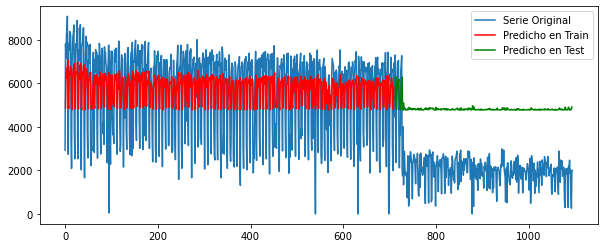

In [550]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize = (10,4))
plt.plot(scaler.inverse_transform(dataset), label= 'Serie Original')
plt.plot(trainPredictPlot,color ='r', label= 'Predicho en Train')
plt.plot(testPredictPlot,color = 'g', label= 'Predicho en Test')
plt.legend()
plt.show()

### Informe Final. 

**Evaluación cualitativa:** 

Desarrollar este Proyecto Final y las mejoras planteadas al inicio del mismo, (implementar las librerías Prophet y Keras,mejorar la calidad de las visualizaciones y del código) me resultó un desafío interesante que me condujo a profundizar mis conocimientos de forma autónoma, incrementando además mi capacidad para buscar soluciones, interpretar patrones y lograr demostrarlos. 

Asimismo, logré realizar todo el proceso cumpliendo con un marco de tiempo predefinido y acotado, preparándome para en un futuro cercano ser competente en un trabajo en equipo, gestionando el desempeño bajo metodologías ágiles.

En conclusión, logré desarrollar nuevas habilidades; sobre todo aquellas de índole técnicas y en específico alcanzar nuevos niveles de abstracción y comprensión computacional.

**Evaluación cuantitativa del Proyecto Final:**

Los resultados de los nuevos modelos implementados fueron heterogéneos. Con Prophet logré implementar un modelo de mejor desempeño predictivo. El mejor de todos los implementados.

Por los resultados obtenidos en la implementación de Keras y por la amplitud del espectro de Deep Learning; aún me queda mucho por descubrir y conocimiento que adquirir. Pero de igual manera, mediante la lectura de las características de estos modelos, aprendí que los mismos obtienen un mejor desempeño al trabajar con datos no estructurados.


**Resultados del RMSE en Test en los modelos implementados:**


**Modelo Benchmark, error en Test:** 2085.58.

**Random Forest Regressor, error en Test:** 810.66.

**Multi-Step Predictión, error en Test:** 761.89.

**Prophet, error en Test:** 310.89

**Modelo Long Short-Term Memory (LSTM), error en Test:** 2409.53

**Conclusión** el mejor modelo de los implementados, considerando el resultado de RMSE obtenido en Test y por el bajo costo computacional es **Prophet.**

***Nuevas preguntas por responder***

Las preguntas que aún no pude responder y deseo hacerlo son las mismas que planteé al finalizar el Proyecto N° 3:

Al haber evidenciado un cambio marcado en el flujo de tránsito pesado, en la Ciudad Autónoma de Buenos Aires y la provincia de Buenos Aires (dónde se concentran grandes empresas; principales puertos del país y puertos secos), resulta necesario entender que el mismo tiene un potenciál de gran impacto en los intercambios comerciales hacia el interior y exterior del país.

Cualquier alteración, en el sistema de autopistas, no se circuncribe unicamente a un efecto sobre la calidad de vida de los habitantes de la Ciudad Autónoma de Buenos Aires, y la provincia de Buenos Aires. El potencial impacto es de índole Federal.

Por ese motivo, y cómo expresé con anterioridad buscaré agregar a mi análisis nuevos datasets correspondientes al flujo vehícular de otras autopistas(que se articulan con las de la empresa AUSA SA) con la finalidad de comprender a mayor profundidad la modificación en la dinámica del tránsito evidenciado en años anteriores y a partir de ese conocimiento, procesar los nuevos datos y efectuar una mejor predicción sobre lo que pudiera suceder ante cambios de magnitud en el flujo vehícular en territorio de la Ciudad Autónoma de Buenos Aires, y la provincia de Buenos Aires y su potencial impacto a nivel país.